In [1]:
import pandas as pd
import numpy as np
import os
pasta_dados_simulados = "E:/mestrado/Pesquisa/Dados simulados"
# redes_neurais_df = pd.concat([pd.read_csv(f"{pasta_dados_simulados}/redes neurais - config {confg}.csv") for confg in [1, 2, 4]], ignore_index=True)

In [2]:
from scipy.stats import chi2
M = 12
alpha = 0.05
alpha_0 = 1 - (1-alpha)**(1/(2*M+1))
critical_value = chi2.ppf(1 - alpha_0, 1)

In [3]:
from scipy.stats import pearsonr
def correlacao(data_index, config):
    df = pd.read_csv(f"{pasta_dados_simulados}/Dados/config {config}/{data_index}/partition size 100/train.csv")
    cols = ['whislo', 'q1', 'med', 'q3', 'whishi']
    seen = []
    correlacoes = {}
    for col1 in cols:
        for col2 in cols:
            if col2 != col1 and {col1, col2} not in seen:
                seen.append({col1, col2})
                print(col1, 'vs', col2)
                s_m, veredito = correlacao_entre_series(df[col1], df[col2])
                correlacoes[f"{col1} vs {col2}"] = {"Estatística de teste": s_m, "Veredito": veredito}
    return correlacoes
    
                                                                              
def correlacao_entre_series(s1, s2):
    s_m = Haugh(s1, s2, M)
    print("Coeficiente de correlação:", s_m)
    if s_m > critical_value:
        veredito = "Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes."
    else:
        veredito = "Não há evidências estatísticas para rejeitar a hipótese nula, as séries são independentes."
    print(veredito)
    return s_m, veredito
        
# HAUGH
def Haugh(series_a, series_b, M):
    n = len(series_a)
    return n*sum([r(series_a, series_b, j)**2 for j in range(-M, M)])

def r(series_a, series_b, j):
    if j >= 0:
        n = len(series_a)
        raiz_prod_soma = np.sqrt(sum([series_a[t]**2 for t in range(1, n)])*sum([series_b[t]**2 for t in range(1, n)]))
        return sum([series_a[t]*series_b[t-j]/raiz_prod_soma for t in range(j+1, n)])
    else:
        return r(series_b, series_a, -j)


In [4]:
dataframe_correlacoes = pd.DataFrame()
cenarios = {1: 'Passeio Aleatório', 2: 'Mapa Logístico', 4: 'Van der Pol Estocástico', 5: 'NAR', 6: 'STAR1', 7: 'STAR2'}
index = 0
for data_index in range(10):
    for config in [4, 5, 6, 7]:
        row = pd.Series({"Índice da iteração no Monte Carlo": data_index, "Cenário": cenarios[config]}, name=index)
        print(f"Data_index: {data_index}", f"Config {config}")
        teste_correlacao_caso_atual = correlacao(data_index,config)
        for colunas, teste in teste_correlacao_caso_atual.items():
            for k, v in teste.items():
                row[f"{k} - {colunas}"] = v
        dataframe_correlacoes = dataframe_correlacoes.append(row)
        index+=1
print(dataframe_correlacoes.shape[0])
dataframe_correlacoes.to_csv(f"{pasta_dados_simulados}/Correlacoes.csv")

Data_index: 0 Config 4
whislo vs q1
Coeficiente de correlação: 179398.75932934874
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 1674.4143628863662
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 179211.23914318896
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 179433.6840847676
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 1521.9331333867437
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179408.15409756094
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 179595.56936997385
Há evidências estatís

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 118590.21131128498
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 126517.66804502088
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 119163.17257262129
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 122793.28064381605
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 146185.08686742146
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179709.46258005913
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 173763.3586517334
Há evidências estatísticas para rejeitar a hipótese nula,

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 179646.9213242551
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 179594.25684721663
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 178772.39497570184
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 179476.82810839172
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179727.5725190557
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 178718.63249313715
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 179307.73761495703
Há evidências estatísticas para rejeitar a hipótese nula, 

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 179435.2718025018
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 179461.76797431582
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 179554.37637912316
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 177248.12066786658
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179709.72874981406
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179677.62080190552
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 176400.3758524533
Há evidências estatísticas para rejeitar a hipótese nula, 

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 179621.25740006063
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 140363.630274907
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 178455.39375094825
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 179653.45201557098
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 140785.46793962034
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 178203.31117138907
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 179580.79995821044
Há evidências estatísticas para rejeitar a hipótese nula, 

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 115293.50967288137
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 122068.98407037629
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 114359.79772249695
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 93624.29276924892
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 165689.86779136778
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179649.10041860663
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 166450.85923695308
Há evidências estatísticas para rejeitar a hipótese nula,

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 179275.16307088043
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 179236.4298744886
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 178589.7448529934
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 178626.38429311157
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179676.84476891183
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 178800.65705781762
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 177410.44172354368
Há evidências estatísticas para rejeitar a hipótese nula, 

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 178849.09734272066
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 178806.4791284677
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 178548.89718272223
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 178094.78844231914
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179704.77695486715
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179661.5868976094
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 175787.77671939903
Há evidências estatísticas para rejeitar a hipótese nula, 

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 169637.51307912046
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 67079.37844805937
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 129726.95135581131
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 154453.89129427803
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 100735.58581113076
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 92482.48870790856
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 126708.31003602028
Há evidências estatísticas para rejeitar a hipótese nula, 

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 133251.64936080613
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 134824.8995332365
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 132912.9433689762
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 150143.48684992795
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 172852.6535447779
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179708.04380436067
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 147727.88694906284
Há evidências estatísticas para rejeitar a hipótese nula, a

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 179026.1703122825
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 179037.79411811449
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 175413.101290814
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 179504.10877952343
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179753.30698204337
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 177140.08475800746
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 178628.72155994296
Há evidências estatísticas para rejeitar a hipótese nula, a

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 179003.343338248
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 179043.11003410607
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 179068.65875039436
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 178750.2889925361
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179734.82825177212
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179731.20114215816
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 177240.03910798175
Há evidências estatísticas para rejeitar a hipótese nula, a

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 179254.28069233877
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 16028.973843198039
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 178509.83557014904
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 178821.76444727066
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 17833.37920051269
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 177632.559266687
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 178080.80234130696
Há evidências estatísticas para rejeitar a hipótese nula, a

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 164233.29877044307
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 147559.29270932346
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 164580.68250388556
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 166701.60374473975
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 170316.62607220153
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179703.8082581203
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 138898.37312219554
Há evidências estatísticas para rejeitar a hipótese nula,

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 179376.02136110986
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 179369.68786998387
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 179189.41039018473
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 179666.23807518015
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179719.36337662977
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179064.09302725625
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 179466.98973137292
Há evidências estatísticas para rejeitar a hipótese nula

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 178848.23667330568
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 178827.0405547493
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 178669.39233290157
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 179114.0313311952
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179720.832769386
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179686.67347354675
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 178600.71428242064
Há evidências estatísticas para rejeitar a hipótese nula, as

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 167726.5901857503
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 154917.9537149352
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 8045.825549352236
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 64064.77607870368
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 174860.50947523696
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 123.30819077723575
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 33190.372685406626
Há evidências estatísticas para rejeitar a hipótese nula, as

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 146642.0486727532
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 139296.26220137015
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 146662.41047170194
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 164303.93369624365
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 174156.68319024745
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179687.1790729377
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 168929.50530194317
Há evidências estatísticas para rejeitar a hipótese nula, 

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 177600.84840942413
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 177600.88583972023
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 177445.88925530625
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 178490.39810715854
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179668.2517774919
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179128.14594744105
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 179233.50826849916
Há evidências estatísticas para rejeitar a hipótese nula,

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 177496.40264208044
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 177457.1997193431
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 177333.17031237987
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 178659.72284393606
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179722.361597872
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179697.79340251838
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 177988.7380149529
Há evidências estatísticas para rejeitar a hipótese nula, as

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 175499.0077241618
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 3295.6051568326184
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 162333.12210238833
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 156290.1883571115
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 120.04404928769388
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 149081.38297965625
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 145693.13636842166
Há evidências estatísticas para rejeitar a hipótese nula, 

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 141465.52490494674
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 120069.75962821607
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 142622.52664681515
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 178115.40746667748
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 173315.51176167547
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179699.28856691523
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 132573.28485577588
Há evidências estatísticas para rejeitar a hipótese nula

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 178923.01297646473
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 178876.61337929743
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 177944.21361788546
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 178732.9224352614
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179719.936414143
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 178382.78650019344
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 177403.91361334975
Há evidências estatísticas para rejeitar a hipótese nula, a

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 179381.09429406747
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 179421.03118717813
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 179455.65672404232
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 174950.12826864404
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179693.23815259789
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179694.16337115862
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 176073.68062038883
Há evidências estatísticas para rejeitar a hipótese nula

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 172004.4242911725
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 6005.455210878064
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 145981.11287909982
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 154764.574307339
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 189.9267953860615
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 122734.00871042226
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 138204.854527205
Há evidências estatísticas para rejeitar a hipótese nula, as sé

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 120379.63391280382
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 98241.67308709948
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 120573.2534589044
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 124882.3783961508
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 145748.31717139753
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179697.31815023263
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 170806.3634424891
Há evidências estatísticas para rejeitar a hipótese nula, as

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 178748.43003024373
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 178684.20658196608
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 177531.3657260106
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 177696.9158448754
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179697.20634092664
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 177525.68183270274
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 179091.13673367604
Há evidências estatísticas para rejeitar a hipótese nula, 

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 178826.72030157663
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 178702.56461070638
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 177909.81040435718
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 175980.88434472974
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179683.42810571234
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179442.5524674963
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 173240.18037310202
Há evidências estatísticas para rejeitar a hipótese nula,

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 178072.8753214163
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 2461.058054241111
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 173752.16837774604
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 171063.50856255981
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 548.8647421826803
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 169120.3904421854
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 166688.72436814796
Há evidências estatísticas para rejeitar a hipótese nula, as

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 172624.2036810892
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 166545.32548326053
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 172585.86693869872
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 132712.40696572047
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 167724.5628359081
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179705.61209557895
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 114366.01139618976
Há evidências estatísticas para rejeitar a hipótese nula, 

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 179639.08748487115
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 179597.41613290142
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 178688.45994333707
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 179196.32076634886
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179653.61875574032
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 178668.93141822392
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 178767.73330249632
Há evidências estatísticas para rejeitar a hipótese nula

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 178711.19940934898
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 178778.46107954215
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 178916.56844817675
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 179027.51645678442
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179688.28822905335
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179648.78096599822
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 179537.1363580903
Há evidências estatísticas para rejeitar a hipótese nula,

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 179469.16769967764
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 7586.916705979981
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 177063.9251942119
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 178213.39465908727
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 8041.0051777797335
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 176398.71289175033
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 177803.4706861364
Há evidências estatísticas para rejeitar a hipótese nula, a

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 156325.1641121313
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 151484.51155226986
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 155986.09080749154
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 155562.48220450996
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 174998.82685592058
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179707.49986983603
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 150380.8657068223
Há evidências estatísticas para rejeitar a hipótese nula, 

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 178935.16575612436
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 179014.68114667383
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 178080.46887488288
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 179174.29229498113
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179687.4585462405
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179249.96624029367
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 178526.81378630715
Há evidências estatísticas para rejeitar a hipótese nula,

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 178748.3812034771
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 178874.93135114943
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 178753.4822911389
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 177835.03215621127
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179713.82599339745
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179691.9851730719
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 176341.60224278865
Há evidências estatísticas para rejeitar a hipótese nula, a

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 179422.30313223123
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 2275.7658985396693
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 179573.87591868345
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 179683.44522409517
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 1421.8304604238306
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 178888.80282964645
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 179099.26790269205
Há evidências estatísticas para rejeitar a hipótese nula

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 145224.39520498656
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 145537.49777710225
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 144368.2913761005
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 152780.09561786547
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 172838.29477192773
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179693.6225787125
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 171323.73383474143
Há evidências estatísticas para rejeitar a hipótese nula, 

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 179131.39408907326
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 179157.9899112731
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 176452.17846069433
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 179487.89515549465
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179660.8590950736
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 178045.71605269046
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 179527.83276766102
Há evidências estatísticas para rejeitar a hipótese nula, 

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


Coeficiente de correlação: 179171.38345665619
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs med
Coeficiente de correlação: 179189.77226004537
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs q3
Coeficiente de correlação: 179281.88119443387
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
whislo vs whishi
Coeficiente de correlação: 178828.98696498413
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs med
Coeficiente de correlação: 179681.34839961812
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs q3
Coeficiente de correlação: 179625.2675135994
Há evidências estatísticas para rejeitar a hipótese nula, as séries não são independentes.
q1 vs whishi
Coeficiente de correlação: 177705.1655209236
Há evidências estatísticas para rejeitar a hipótese nula, 

C:\Users\lfbjc\AppData\Local\Temp\ipykernel_10272\2757799407.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_correlacoes = dataframe_correlacoes.append(row)


In [7]:
from matplotlib import pyplot as plt
def compare(steps_ahead, config):
    redes_neurais_df = pd.read_csv(f"{pasta_dados_simulados}/redes neurais - config {config}.csv")
    arima_df = pd.read_csv(f"{pasta_dados_simulados}/ARIMA/config {config}/boxplot/particao de tamanho 100.csv")
    var_df = pd.read_csv(f"{pasta_dados_simulados}/VAR/config {config}/boxplot/particao de tamanho 100.csv")
    redes_neurais_df_filtrado = redes_neurais_df[redes_neurais_df['steps_ahead'] == steps_ahead]
    arima_df_filtrado = arima_df[arima_df['steps_ahead'] == steps_ahead]
    var_df_filtrado = var_df[var_df['steps_ahead'] == steps_ahead]
    cnn_df = redes_neurais_df_filtrado[redes_neurais_df_filtrado['model_type'] == "CNN"]
    lstm_df = redes_neurais_df_filtrado[redes_neurais_df_filtrado['model_type'] == "LSTM"]
    plt.boxplot([arima_df_filtrado['mean_test_score'], var_df_filtrado['test_score'], cnn_df['test_score'], lstm_df['test_score']], labels=["ARIMA", "VAR", "CNN", "LSTM"])
    os.makedirs(f"{pasta_dados_simulados}/Comparações de resultados/{cenarios[config]}", exist_ok=True)
    plt.savefig(f"{pasta_dados_simulados}/Comparações de resultados/{cenarios[config]}/Prevendo {steps_ahead} passos à frente.png", )
    plt.show()
    

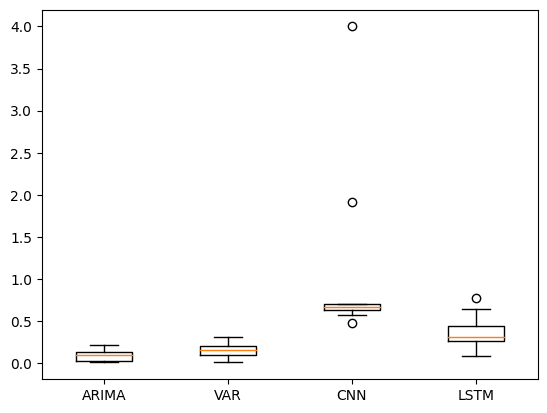

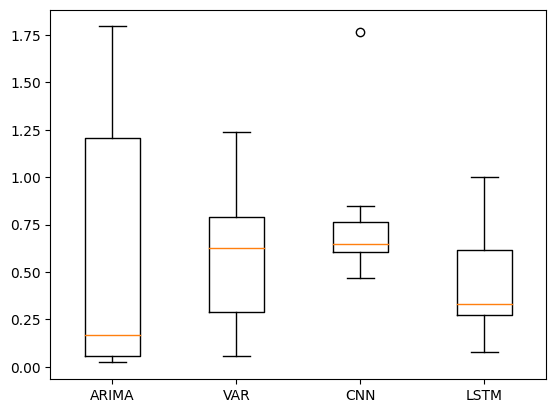

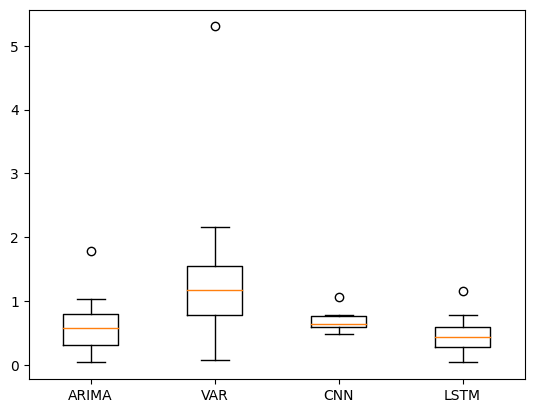

FileNotFoundError: [Errno 2] No such file or directory: 'E:/mestrado/Pesquisa/Dados simulados/redes neurais - config 5.csv'

In [8]:
for config in [4, 5, 6, 7]:
    for steps_ahead in [1, 5, 20]:
        compare(steps_ahead, config)